# **Support Vector Boundary**




Isotropic data generator documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) \
Support vector classifier documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs 

(150, 2) (150,)


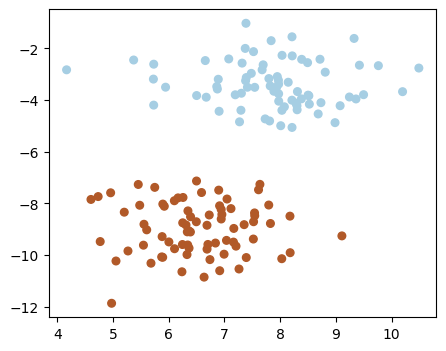

In [8]:
# we create 40 separable points
X, y = make_blobs(n_samples = 150, centers = 2 , random_state = 6)
print(X.shape, y.shape)
_,ax = plt.subplots(figsize=(5,4))
plt.scatter( X[:,0], X[:,1], c = y, s = 30, cmap = plt.cm.Paired)

In [14]:
clf = SVC(kernel = "linear",random_state= 2 )

clf.fit(X,y)

SVC(kernel='linear', random_state=2)

In [18]:
offset = 0.5
h_min, h_max = X[:, 0] .min()-offset, X[: , 0] .max()+offset
v_min, v_max = X[: ,1] .min()-offset, X[: , 1] .max()+offset

# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace( h_min , h_max , 100), np.linspace( v_min , v_max , 100))

# Predecir los valores del grid
pred_grid = clf.decision_function ( np.c_[h_grid.ravel(),v_grid.ravel()] )
print (pred_grid.shape)

# Encajar las predicciones al tamaño del grid
pred_grid = pred_grid.reshape( h_grid.shape )
print (pred_grid.shape, h_grid.shape, v_grid.shape)

(10000,)
(100, 100) (100, 100) (100, 100)


[]

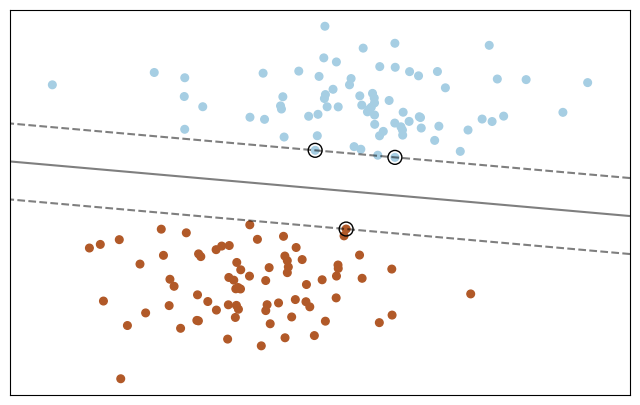

In [23]:
_, ax = plt.subplots (figsize=(8,5))
ax.scatter( X[:, 0] , X[:, 1] , c = y , s = 30, cmap = plt.cm.Paired)

# plot decision boundary and margins
ax.contour( h_grid , v_grid , pred_grid , colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

# ax.set_xlim(x_grid.min()-.1, x_grid.max()+.1)
# ax.set_ylim(y_grid.min()-.1, y_grid.max()+.1)

ax.set_xticks(())
ax.set_yticks(())

## In real data

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris

(150, 2) (150,) ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


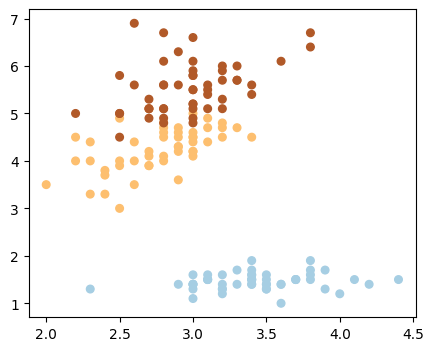

In [27]:
# import some data to play with
iris = load_iris() 
X = iris.data[: , 1 : 3]   # Pick 2 features
y = iris.target
feature_names = iris.feature_names

print(X.shape, y.shape, feature_names)

_, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

In [28]:
# Create an instance of SVM and fit the data.
clf = SVC(kernel="linear", random_state=2) 
clf.fit( X , y )

SVC(kernel='linear', random_state=2)

In [38]:
# Plot decision boundaries
offset = 0.1
h_min, h_max = X[:, 0].min() - offset, X[:, 0].max() + offset
v_min, v_max = X[:, 1].min() - offset, X[:, 1].max() + offset

h_grid, v_grid = np.meshgrid(np.linspace(h_min, h_max, 40), np.linspace(v_min, v_max, 80))

pred_grid = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
pred_grid = pred_grid.reshape(h_grid.shape)
print(pred_grid.shape, h_grid.shape, v_grid.shape)

(80, 40) (80, 40) (80, 40)


Text(0, 0.5, 'petal length (cm)')

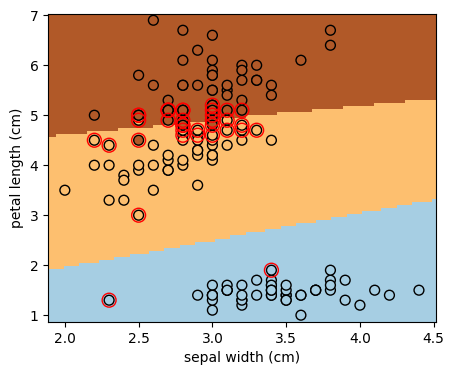

In [37]:
_,ax = plt.subplots(figsize=(5,4))

ax.pcolormesh(h_grid, v_grid, pred_grid, cmap=plt.cm.Paired)
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", s=50, cmap=plt.cm.Paired)
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="r")
ax.set_xlabel(feature_names[1])
ax.set_ylabel(feature_names[2])
